# ININO216A: IA PARA CIENCIA DE DATOS

## Contenido

1. Cargar librerías
1. Leer archivo y procesar datos
1. ML methods
1. Fine-tuning
1. Model Comparison

## 1. Cargar librerías

In [1]:
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

np.random.seed(0)

In [2]:
# Sklearn processing modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn algorithms for ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Sklearn classification model evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## 2. Leer archivo y procesar datos

### 2.1 Leer archivo

In [3]:
dataSet = pd.read_csv("Amazon_Unlocked_Mobile.zip", compression='zip', header=0)
print(dataSet)

                                             Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                         

### 2.2 Preprocesamiento

NOTA: cambio en el etiquetado

In [4]:
dataSet.dropna(inplace=True)
dataSet = dataSet.iloc[0:50000,:]

# Encode 4s and 5s as positive
dataSet['Sentiment'] = 2

for row in range(len(dataSet)):
  if dataSet.iloc[row,3] > 3:
    dataSet.iloc[row,6] = 4

datos = ['Reviews', 'Rating', 'Sentiment']
misDatos = dataSet[datos]
print(misDatos.head(20))

misDatos = misDatos[['Reviews', 'Sentiment']]
print(misDatos.head(20))

                                              Reviews  Rating  Sentiment
0   I feel so LUCKY to have found this used (phone...       5          4
1   nice phone, nice up grade from my pantach revu...       4          4
2                                        Very pleased       5          4
3   It works good but it goes slow sometimes but i...       4          4
4   Great phone to replace my lost phone. The only...       4          4
5   I already had a phone with problems... I know ...       1          2
6   The charging port was loose. I got that solder...       2          2
7   Phone looks good but wouldn't stay charged, ha...       2          2
8   I originally was using the Samsung S2 Galaxy f...       5          4
9   It's battery life is great. It's very responsi...       3          2
10  My fiance had this phone previously, but cause...       3          2
11  This is a great product it came after two days...       5          4
12  These guys are the best! I had a little situat.

### 2.3 Split Data

In [5]:
# Split data into train and test sets
train_size = 0.75
test_size = 1 - train_size
trainSet, testSet = train_test_split(misDatos, test_size=test_size, shuffle=True, random_state=0)

print("Train set")
print(trainSet.head())
print()
print('trainSet shape: ', trainSet.shape)
print()

print("Test set")
print(testSet.head())
print()
print('testSet shape: ', testSet.shape)

Train set
                                                 Reviews  Sentiment
49657                                              Super          4
25773  Awesome service and went out of way to make su...          4
42791  The phone is as described, no complaints. Its ...          4
44626  Very undone. Speaker was blown, front facing h...          2
39543  The phone seems to be decent, but I can't be s...          2

trainSet shape:  (37500, 2)

Test set
                                                 Reviews  Sentiment
18699  Great purchase had a bit of problem getting Fa...          4
27243       Very fast shipping. Product like description          4
62620  I was very excited to receive this in the mail...          2
33496  It stoped working a week atfer i got it , it s...          2
57107                                           not good          2

testSet shape:  (12500, 2)


### 2.4 Vectorizar datos

In [6]:
vectorizer = TfidfVectorizer(stop_words='english',  ## NOTA: este se quita porque los comentarios están en español
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainSet['Reviews'])
test_vectors = vectorizer.transform(testSet['Reviews'])

print(train_vectors)
print("\n")
print(test_vectors)

  (0, 4206)	1.0
  (1, 465)	0.3732214938577385
  (1, 3836)	0.34498262927372236
  (1, 4757)	0.37970489192330326
  (1, 4737)	0.37702388902195494
  (1, 2645)	0.3903473716133277
  (1, 4223)	0.39500536646931483
  (1, 3354)	0.315371065344649
  (1, 1926)	0.21796941358055422
  (2, 3132)	0.09440577389052866
  (2, 1227)	0.22183363192563105
  (2, 953)	0.3065525989603865
  (2, 4811)	0.2083967705063876
  (2, 4054)	0.46907793611622456
  (2, 4617)	0.21115755149998972
  (2, 2445)	0.41926090735462823
  (2, 1967)	0.13232587749610572
  (2, 736)	0.2562859284572832
  (2, 913)	0.43849454936536236
  (2, 3942)	0.29766132562048175
  (3, 4046)	0.23041057419377609
  (3, 592)	0.3161883134199908
  (3, 1637)	0.47112298092726057
  (3, 3556)	0.2242573659775506
  (3, 511)	0.15722438848853545
  :	:
  (37496, 314)	0.156436439166711
  (37496, 2877)	0.2467761527045587
  (37496, 2915)	0.2360719389896648
  (37496, 478)	0.16664428448470933
  (37496, 4742)	0.21859670380621032
  (37496, 4291)	0.2557946782329826
  (37496, 1198)	

## 3. ML methods

NOTA: agrego SVC

In [7]:
# DataFrames to store model predictions
columnsNames = ['Sentiment', 'DT Sentiment', 'RF Sentiment', 'SVM Sentiment', 'Grid DT Sentiment', 'Grid RF Sentiment', 'Grid SVM Sentiment']
trainModel = pd.DataFrame(columns=columnsNames)
testModel = pd.DataFrame(columns=columnsNames)
trainModel['Sentiment'] = trainSet['Sentiment']
testModel['Sentiment'] = testSet['Sentiment']
print(trainModel.head())
print()
print(testModel.head())

       Sentiment DT Sentiment RF Sentiment SVM Sentiment Grid DT Sentiment  \
49657          4          NaN          NaN           NaN               NaN   
25773          4          NaN          NaN           NaN               NaN   
42791          4          NaN          NaN           NaN               NaN   
44626          2          NaN          NaN           NaN               NaN   
39543          2          NaN          NaN           NaN               NaN   

      Grid RF Sentiment Grid SVM Sentiment  
49657               NaN                NaN  
25773               NaN                NaN  
42791               NaN                NaN  
44626               NaN                NaN  
39543               NaN                NaN  

       Sentiment DT Sentiment RF Sentiment SVM Sentiment Grid DT Sentiment  \
18699          4          NaN          NaN           NaN               NaN   
27243          4          NaN          NaN           NaN               NaN   
62620          2          

In [8]:
# DataFrames to store model performance metrics
methodsUsed=['DT', 'RF', 'SVM', 'Grid DT', 'Grid RF', 'Grid SVM']
performanceHeaders=['accuracy', 'precision','recall','f1-score']
trainModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
testModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
print(trainModelMetrics)
print()
print(testModelMetrics)

         accuracy precision recall f1-score
DT            NaN       NaN    NaN      NaN
RF            NaN       NaN    NaN      NaN
SVM           NaN       NaN    NaN      NaN
Grid DT       NaN       NaN    NaN      NaN
Grid RF       NaN       NaN    NaN      NaN
Grid SVM      NaN       NaN    NaN      NaN

         accuracy precision recall f1-score
DT            NaN       NaN    NaN      NaN
RF            NaN       NaN    NaN      NaN
SVM           NaN       NaN    NaN      NaN
Grid DT       NaN       NaN    NaN      NaN
Grid RF       NaN       NaN    NaN      NaN
Grid SVM      NaN       NaN    NaN      NaN


In [9]:
# Perform classification with DT
print('Classification with DT')
classifier_dt = DecisionTreeClassifier(max_depth=5)
classifier_dt.fit(train_vectors, trainSet.iloc[:,1:])

trainModel['DT Sentiment'] = classifier_dt.predict(train_vectors)
testModel['DT Sentiment'] = classifier_dt.predict(test_vectors)

print(testModel)

# --- Train Metrics ---
trainModelMetrics.iloc[0, 0] = accuracy_score(trainModel['Sentiment'], trainModel['DT Sentiment'])
trainModelMetrics.iloc[0, 1] = precision_score(trainModel['Sentiment'], trainModel['DT Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[0, 2] = recall_score(trainModel['Sentiment'], trainModel['DT Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[0, 3] = f1_score(trainModel['Sentiment'], trainModel['DT Sentiment'], average='macro', zero_division=0)

# --- Test Metrics ---
testModelMetrics.iloc[0, 0] = accuracy_score(testModel['Sentiment'], testModel['DT Sentiment'])
testModelMetrics.iloc[0, 1] = precision_score(testModel['Sentiment'], testModel['DT Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[0, 2] = recall_score(testModel['Sentiment'], testModel['DT Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[0, 3] = f1_score(testModel['Sentiment'], testModel['DT Sentiment'], average='macro', zero_division=0)

print(trainModelMetrics)
print()
print(testModelMetrics)
print()

# Detailed classification report
report = classification_report(trainModel['Sentiment'], trainModel['DT Sentiment'])
print("Detailed Classification Report for Decision Tree:")
print(report)

Classification with DT
       Sentiment  DT Sentiment RF Sentiment SVM Sentiment Grid DT Sentiment  \
18699          4             4          NaN           NaN               NaN   
27243          4             4          NaN           NaN               NaN   
62620          2             2          NaN           NaN               NaN   
33496          2             4          NaN           NaN               NaN   
57107          2             4          NaN           NaN               NaN   
...          ...           ...          ...           ...               ...   
22243          4             4          NaN           NaN               NaN   
10291          4             4          NaN           NaN               NaN   
50657          4             4          NaN           NaN               NaN   
38506          4             4          NaN           NaN               NaN   
9309           4             4          NaN           NaN               NaN   

      Grid RF Sentiment Grid

In [10]:
# Perform the class with RF
print('Classification with RF')
classifier_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
classifier_rf.fit(train_vectors, trainSet.iloc[:,1:])

trainModel['RF Sentiment'] = classifier_rf.predict(train_vectors)
testModel['RF Sentiment'] = classifier_rf.predict(test_vectors)

print(testModel)

# --- Train Metrics ---
trainModelMetrics.iloc[1, 0] = accuracy_score(trainModel['Sentiment'], trainModel['RF Sentiment'])
trainModelMetrics.iloc[1, 1] = precision_score(trainModel['Sentiment'], trainModel['RF Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[1, 2] = recall_score(trainModel['Sentiment'], trainModel['RF Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[1, 3] = f1_score(trainModel['Sentiment'], trainModel['RF Sentiment'], average='macro', zero_division=0)

# --- Test Metrics ---
testModelMetrics.iloc[1, 0] = accuracy_score(testModel['Sentiment'], testModel['RF Sentiment'])
testModelMetrics.iloc[1, 1] = precision_score(testModel['Sentiment'], testModel['RF Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[1, 2] = recall_score(testModel['Sentiment'], testModel['RF Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[1, 3] = f1_score(testModel['Sentiment'], testModel['RF Sentiment'], average='macro', zero_division=0)

print(trainModelMetrics)
print()
print(testModelMetrics)
print()

# Detailed classification report
report = classification_report(trainModel['Sentiment'], trainModel['RF Sentiment'])
print("Detailed Classification Report for Random Forest:")
print(report)

Classification with RF
       Sentiment  DT Sentiment  RF Sentiment SVM Sentiment Grid DT Sentiment  \
18699          4             4             4           NaN               NaN   
27243          4             4             4           NaN               NaN   
62620          2             2             4           NaN               NaN   
33496          2             4             4           NaN               NaN   
57107          2             4             4           NaN               NaN   
...          ...           ...           ...           ...               ...   
22243          4             4             4           NaN               NaN   
10291          4             4             4           NaN               NaN   
50657          4             4             4           NaN               NaN   
38506          4             4             4           NaN               NaN   
9309           4             4             4           NaN               NaN   

      Grid RF Se

In [11]:
# Perform the class with SVM
print('Classification with SVM')
classifier_svm = svm.SVC(kernel="poly")
classifier_svm.fit(train_vectors, trainSet.iloc[:,1:])

trainModel['SVM Sentiment'] = classifier_svm.predict(train_vectors)
testModel['SVM Sentiment'] = classifier_svm.predict(test_vectors)

print(testModel)

# --- Train Metrics ---
trainModelMetrics.iloc[2, 0] = accuracy_score(trainModel['Sentiment'], trainModel['SVM Sentiment'])
trainModelMetrics.iloc[2, 1] = precision_score(trainModel['Sentiment'], trainModel['SVM Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[2, 2] = recall_score(trainModel['Sentiment'], trainModel['SVM Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[2, 3] = f1_score(trainModel['Sentiment'], trainModel['SVM Sentiment'], average='macro', zero_division=0)

# --- Test Metrics ---
testModelMetrics.iloc[2, 0] = accuracy_score(testModel['Sentiment'], testModel['SVM Sentiment'])
testModelMetrics.iloc[2, 1] = precision_score(testModel['Sentiment'], testModel['SVM Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[2, 2] = recall_score(testModel['Sentiment'], testModel['SVM Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[2, 3] = f1_score(testModel['Sentiment'], testModel['SVM Sentiment'], average='macro', zero_division=0)

print(trainModelMetrics)
print()
print(testModelMetrics)
print()

# Detailed classification report
report = classification_report(trainModel['Sentiment'], trainModel['SVM Sentiment'])
print("Detailed Classification Report for SVM:")
print(report)

Classification with SVM
       Sentiment  DT Sentiment  RF Sentiment  SVM Sentiment Grid DT Sentiment  \
18699          4             4             4              4               NaN   
27243          4             4             4              4               NaN   
62620          2             2             4              2               NaN   
33496          2             4             4              2               NaN   
57107          2             4             4              4               NaN   
...          ...           ...           ...            ...               ...   
22243          4             4             4              4               NaN   
10291          4             4             4              4               NaN   
50657          4             4             4              4               NaN   
38506          4             4             4              4               NaN   
9309           4             4             4              4               NaN   

   

## 4. Fine-tuning

In [12]:
# Perform classification with DT
print('Classification with DT')
dt_clf = DecisionTreeClassifier()
param_search_dt = {
        'criterion': ["gini", 'entropy'],
        'max_depth': [5, 10, 20, 30, None]
    }

grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_search_dt, cv=5, verbose=1)
grid_search_dt.fit(train_vectors, trainSet.iloc[:,1:])
best_clf_dt = grid_search_dt.best_estimator_
print(best_clf_dt.get_params())
print("\n")

trainModel['Grid DT Sentiment'] = best_clf_dt.predict(train_vectors)
testModel['Grid DT Sentiment'] = best_clf_dt.predict(test_vectors)

print(testModel)

# --- Train Metrics ---
trainModelMetrics.iloc[3, 0] = accuracy_score(trainModel['Sentiment'], trainModel['Grid DT Sentiment'])
trainModelMetrics.iloc[3, 1] = precision_score(trainModel['Sentiment'], trainModel['Grid DT Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[3, 2] = recall_score(trainModel['Sentiment'], trainModel['Grid DT Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[3, 3] = f1_score(trainModel['Sentiment'], trainModel['Grid DT Sentiment'], average='macro', zero_division=0)

# --- Test Metrics ---
testModelMetrics.iloc[3, 0] = accuracy_score(testModel['Sentiment'], testModel['Grid DT Sentiment'])
testModelMetrics.iloc[3, 1] = precision_score(testModel['Sentiment'], testModel['Grid DT Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[3, 2] = recall_score(testModel['Sentiment'], testModel['Grid DT Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[3, 3] = f1_score(testModel['Sentiment'], testModel['Grid DT Sentiment'], average='macro', zero_division=0)

print(trainModelMetrics)
print()
print(testModelMetrics)
print()

# Detailed classification report
report = classification_report(trainModel['Sentiment'], trainModel['Grid DT Sentiment'])
print("Detailed Classification Report for Grid Search Decision Tree:")
print(report)

Classification with DT
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


       Sentiment  DT Sentiment  RF Sentiment  SVM Sentiment  \
18699          4             4             4              4   
27243          4             4             4              4   
62620          2             2             4              2   
33496          2             4             4              2   
57107          2             4             4              4   
...          ...           ...           ...            ...   
22243          4             4             4              4   
10291          4             4             4              4   
50657          4             4            

In [13]:
# Perform classification with RF
print('Classification with RF')
rf_clf = RandomForestClassifier()
param_search_rf = {
        'n_estimators': [75, 100],
        'max_depth': [5, 15, None]
    }

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_search_rf, cv=5, verbose=1)
grid_search_rf.fit(train_vectors, trainSet.iloc[:,1:])
best_clf_rf = grid_search_rf.best_estimator_
print(best_clf_rf.get_params())
print("\n")

trainModel['Grid RF Sentiment'] = best_clf_rf.predict(train_vectors)
testModel['Grid RF Sentiment'] = best_clf_rf.predict(test_vectors)

print(testModel)

# --- Train Metrics ---
trainModelMetrics.iloc[4, 0] = accuracy_score(trainModel['Sentiment'], trainModel['Grid RF Sentiment'])
trainModelMetrics.iloc[4, 1] = precision_score(trainModel['Sentiment'], trainModel['Grid RF Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[4, 2] = recall_score(trainModel['Sentiment'], trainModel['Grid RF Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[4, 3] = f1_score(trainModel['Sentiment'], trainModel['Grid RF Sentiment'], average='macro', zero_division=0)

# --- Test Metrics ---
testModelMetrics.iloc[4, 0] = accuracy_score(testModel['Sentiment'], testModel['Grid RF Sentiment'])
testModelMetrics.iloc[4, 1] = precision_score(testModel['Sentiment'], testModel['Grid RF Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[4, 2] = recall_score(testModel['Sentiment'], testModel['Grid RF Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[4, 3] = f1_score(testModel['Sentiment'], testModel['Grid RF Sentiment'], average='macro', zero_division=0)

print(trainModelMetrics)
print()
print(testModelMetrics)
print()

# Detailed classification report
report = classification_report(trainModel['Sentiment'], trainModel['Grid RF Sentiment'])
print("Detailed Classification Report for Grid Search Random Forest:")
print(report)

Classification with RF
Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


       Sentiment  DT Sentiment  RF Sentiment  SVM Sentiment  \
18699          4             4             4              4   
27243          4             4             4              4   
62620          2             2             4              2   
33496          2             4             4              2   
57107          2             4             4              4   
...          ...           ...           ...            ...   
22243          4             4             4              4   
10291          4             4             4              4   
50657          

In [14]:
# Perform the class with SVM
print('Classification with SVM')
svm_clf = svm.SVC()
param_search_svm = {
        'kernel': ['poly']
    }

grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_search_svm, cv=5, verbose=1)
grid_search_svm.fit(train_vectors, trainSet.iloc[:,1:])
best_clf_svm = grid_search_svm.best_estimator_
print(best_clf_svm.get_params())
print("\n")

trainModel['Grid SVM Sentiment'] = best_clf_svm.predict(train_vectors)
testModel['Grid SVM Sentiment'] = best_clf_svm.predict(test_vectors)

print(testModel)

# --- Train Metrics ---
trainModelMetrics.iloc[5, 0] = accuracy_score(trainModel['Sentiment'], trainModel['Grid SVM Sentiment'])
trainModelMetrics.iloc[5, 1] = precision_score(trainModel['Sentiment'], trainModel['Grid SVM Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[5, 2] = recall_score(trainModel['Sentiment'], trainModel['Grid SVM Sentiment'], average='macro', zero_division=0)
trainModelMetrics.iloc[5, 3] = f1_score(trainModel['Sentiment'], trainModel['Grid SVM Sentiment'], average='macro', zero_division=0)

# --- Test Metrics ---
testModelMetrics.iloc[5, 0] = accuracy_score(testModel['Sentiment'], testModel['Grid SVM Sentiment'])
testModelMetrics.iloc[5, 1] = precision_score(testModel['Sentiment'], testModel['Grid SVM Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[5, 2] = recall_score(testModel['Sentiment'], testModel['Grid SVM Sentiment'], average='macro', zero_division=0)
testModelMetrics.iloc[5, 3] = f1_score(testModel['Sentiment'], testModel['Grid SVM Sentiment'], average='macro', zero_division=0)

print(trainModelMetrics)
print()
print(testModelMetrics)
print()

# Detailed classification report
report = classification_report(trainModel['Sentiment'], trainModel['Grid SVM Sentiment'])
print("Detailed Classification Report for Grid Search SVM:")
print(report)

Classification with SVM
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


       Sentiment  DT Sentiment  RF Sentiment  SVM Sentiment  \
18699          4             4             4              4   
27243          4             4             4              4   
62620          2             2             4              2   
33496          2             4             4              2   
57107          2             4             4              4   
...          ...           ...           ...            ...   
22243          4             4             4              4   
10291          4             4             4              4   
50657          4             4             4              4   
3850

## 5. Model Comparison

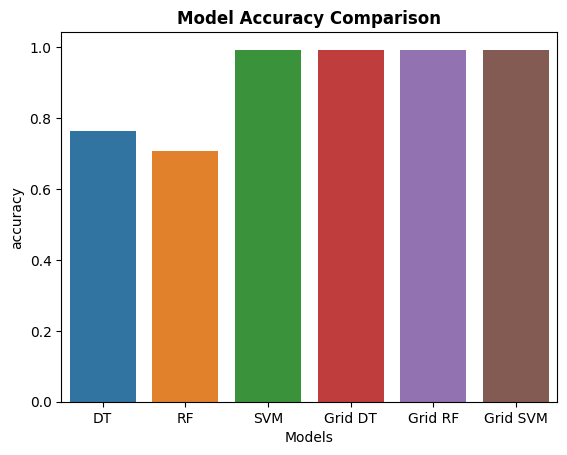

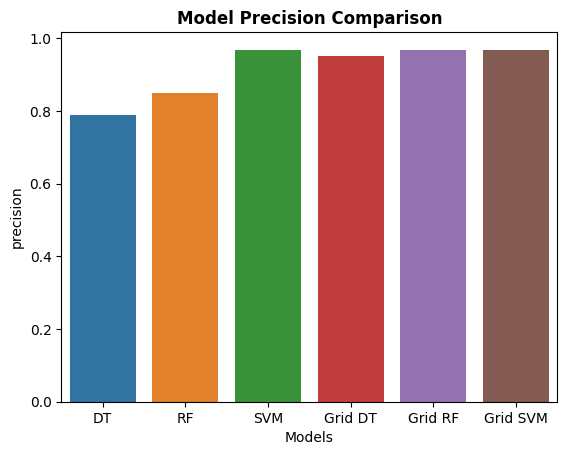

In [15]:
plt.figure()
sns.barplot(x=trainModelMetrics.index, y=trainModelMetrics['accuracy'].astype(float))
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.xlabel('Models')
plt.show()

plt.figure()
sns.barplot(x=testModelMetrics.index, y=testModelMetrics['precision'].astype(float))
plt.title('Model Precision Comparison', fontweight='bold')
plt.xlabel('Models')
plt.show()